In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os



In [8]:
# loading file
from google.colab import files
uploaded = files.upload()

Saving PrideAndPrejudice.txt to PrideAndPrejudice (1).txt


In [13]:
# open file
file = open("PrideAndPrejudice.txt","r", encoding="utf8")

# store file in a list
lines = []
for i in file:
  lines.append(i)



# Now convert this list to string
data = ""
for i in lines:
  data = ' '.join(lines)


#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space


# remove  unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using th'

In [14]:
len(data)

698418

In [16]:
from typing import Sequence
tokenizer=Tokenizer()
tokenizer.fit_on_texts([data])


pickle.dump(tokenizer, open('token.pkl','wb'))

sequence_data=tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 176, 158, 916, 3, 321, 4, 1171, 30, 72, 2534, 41, 916, 23, 21]

In [17]:
len(sequence_data)

125309

In [18]:
vocab_size=len(tokenizer.word_index)+1
print(vocab_size)

7030


In [20]:
sequences = []

for i in range(3,len(sequence_data)):
  words=sequence_data[i-3:i+1]
  sequences.append(words)


print("Length of Sequence are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]


Length of Sequence are:  125306


array([[   1,  176,  158,  916],
       [ 176,  158,  916,    3],
       [ 158,  916,    3,  321],
       [ 916,    3,  321,    4],
       [   3,  321,    4, 1171],
       [ 321,    4, 1171,   30],
       [   4, 1171,   30,   72],
       [1171,   30,   72, 2534],
       [  30,   72, 2534,   41],
       [  72, 2534,   41,  916]])

In [21]:
x = []
y = []

for i in sequences:
  x.append(i[0:3])
  y.append(i[3])

x = np.array(x)
y = np.array(y)

In [22]:
print("Data", x[:10])
print("Response", y[:10])

Data [[   1  176  158]
 [ 176  158  916]
 [ 158  916    3]
 [ 916    3  321]
 [   3  321    4]
 [ 321    4 1171]
 [   4 1171   30]
 [1171   30   72]
 [  30   72 2534]
 [  72 2534   41]]
Response [ 916    3  321    4 1171   30   72 2534   41  916]


In [24]:
y=to_categorical(y,num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
# Creating a model
model =Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000,return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000,activation="relu"))
model.add(Dense(vocab_size,activation="softmax"))



In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 3, 10)             70300     
                                                                 
 lstm_4 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_5 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 7030)              7037030   
                                                                 
Total params: 20,156,330
Trainable params: 20,156,330
Non-trainable params: 0
_________________________________________________________________


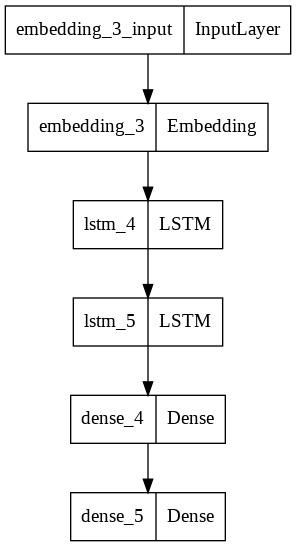

In [37]:
# Plot the model
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model,to_file='plot.png',show_layer_names=True)

In [40]:
from tensorflow.keras import optimizers
# training model

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("next_words.h5",monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=0.001))
model.fit(x,y,epochs=70,batch_size=64,callbacks=[checkpoint])

Epoch 1/70
1958/1958 [==============================] - ETA: 0s - loss: 6.2298
Epoch 00001: loss improved from inf to 6.22985, saving model to next_words.h5
1958/1958 [==============================] - 70s 33ms/step - loss: 6.2298
Epoch 2/70
1957/1958 [============================>.] - ETA: 0s - loss: 5.6227
Epoch 00002: loss improved from 6.22985 to 5.62264, saving model to next_words.h5
1958/1958 [==============================] - 64s 32ms/step - loss: 5.6226
Epoch 3/70
1957/1958 [============================>.] - ETA: 0s - loss: 5.3079
Epoch 00003: loss improved from 5.62264 to 5.30796, saving model to next_words.h5
1958/1958 [==============================] - 64s 33ms/step - loss: 5.3080
Epoch 4/70
1957/1958 [============================>.] - ETA: 0s - loss: 5.0838
Epoch 00004: loss improved from 5.30796 to 5.08389, saving model to next_words.h5
1958/1958 [==============================] - 64s 32ms/step - loss: 5.0839
Epoch 5/70
1957/1958 [============================>.] - ETA: 0s 

In [41]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

In [42]:
# load model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl','rb'))

def Predict_Next_Words(model, tokenizer,text):
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""


  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted_word = key
      break

  print(predicted_word)
  return predicted_word    


In [ ]:
while(True):
  text = input("ENter ur line: ")

  if text == "0":
    print("Execution completed...")
    break

  else:
     try:
       text = text.split(" ")
       text = text[-3:]
       print(text)

       Predict_Next_Words(model, tokenizer, text)

     except Exception as e:
       print("Error occured: ", e)
       continue    

ENter ur line: The Project
['The', 'Project']
Error occured:  in user code:

    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueE